## Importing the Dependencies

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data collection & processing

In [13]:
# car_price_dataset = pd.read_csv("dataset/CAR DETAILS FROM CAR DEKHO.csv")
car_price_dataset = pd.read_csv("dataset/car data.csv")

In [14]:
car_price_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
car_price_dataset.shape

(301, 9)

In [15]:
# statistical measures
car_price_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [17]:
# check for any missing values
car_price_dataset.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [22]:
# checking the distribution of categorical dataset
print(car_price_dataset.Fuel_Type.value_counts())
print(car_price_dataset.Seller_Type.value_counts())
print(car_price_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


## Encoding the Categorical Data

In [24]:
# encoding 
car_price_dataset = car_price_dataset.replace({
    "Fuel_Type": {"Petrol": 0, "Diesel": 1, "CNG": 2},
    "Seller_Type": {"Dealer": 0, "Individual": 1},
    "Transmission": {"Manual": 0, "Automatic": 1}
})

In [25]:
car_price_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting data into Training data and test Data

In [26]:
X = car_price_dataset.drop(columns=["Car_Name", "Selling_Price"], axis=1)
y = car_price_dataset["Selling_Price"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
X.shape, X_train.shape, X_test.shape

((301, 7), (240, 7), (61, 7))

## Training Linear regression model

In [31]:
linear_model = LinearRegression()

In [32]:
linear_model.fit(X_train, y_train)

LinearRegression()

### Evaluating Linear Regression model

In [34]:
# evaluate training data accuracy
y_train_predict = linear_model.predict(X_train)
mse_score = metrics.r2_score(y_train, y_train_predict)

print(f"MSE score: {mse_score}")

MSE score: 0.8811769266678463


In [35]:
# evaluate training data accuracy
y_test_predict = linear_model.predict(X_test)
mse_score = metrics.r2_score(y_test, y_test_predict)

print(f"MSE score: {mse_score}")

MSE score: 0.8316296695666481


In [50]:
## Predictive system
raw_input = (2010.0,18.54,50000.0,0.0,0.0,0.0,0.0)
input_data = np.asarray(raw_input)
input_data = input_data.reshape(1, -1)

linear_model.predict(input_data)[0]

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8.799709653971831

In [52]:
# ",".join([str(x) for x in X.loc[57].values])
y[57]

4.75

## Visualize actual price and predicted prices

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

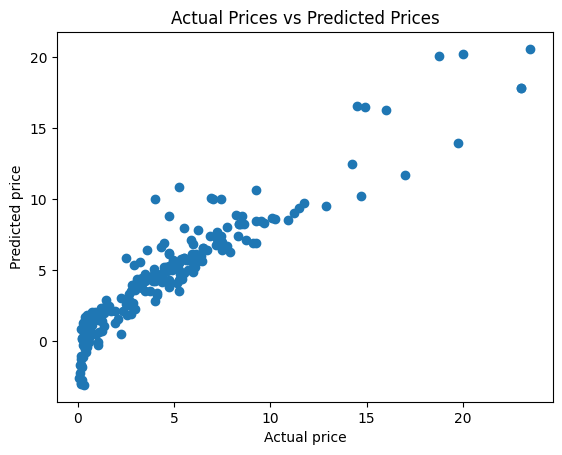

In [55]:
plt.scatter(y_train, y_train_predict)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices")

Text(0.5, 1.0, 'Actual price vs Predicted price')

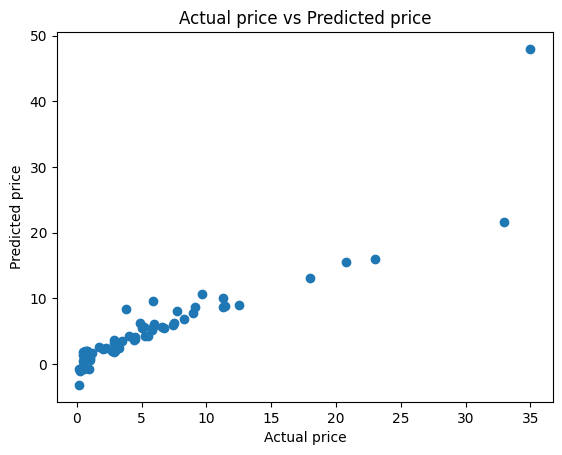

In [58]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")

## Training Lasso Model

In [56]:
lasso_model = Lasso()

In [57]:
lasso_model.fit(X_train, y_train)

Lasso()

### Evaluating model

In [60]:
y_lasso_train_predict = lasso_model.predict(X_train)
error_score = metrics.r2_score(y_train, y_lasso_train_predict)
print(f"Error score for train data: {error_score}")

Error score for train data: 0.8570100208668491


Text(0.5, 1.0, 'Actual price vs Predicted price')

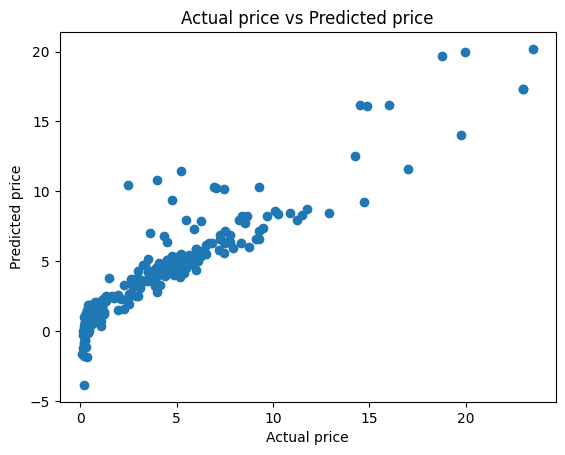

In [62]:
plt.scatter(y_train, y_lasso_train_predict)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")

In [63]:
y_lasso_test_predict = lasso_model.predict(X_test)
error_score = metrics.r2_score(y_test, y_lasso_test_predict)
print(f"Error score for test data: {error_score}")

Error score for test data: 0.8057721792608482


Text(0.5, 1.0, 'Actual price vs Predicted price')

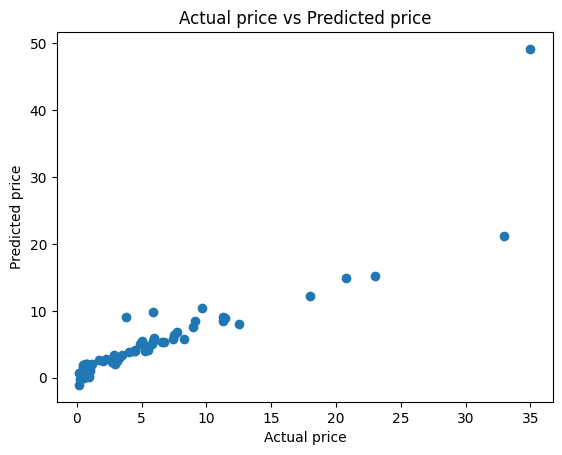

In [64]:
plt.scatter(y_test, y_lasso_test_predict)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")